In [2]:
data_dir = "/local/scratch/datasets/Medical/TeethSeg"

In [3]:
import os

subdirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print("子目录有：", subdirs)


子目录有： ['3DTeethLand_challenge_train_test_split', 'lower', 'upper']


In [4]:
import os
print("当前路径:", os.getcwd())
print("列出数据目录:", os.listdir("/local/scratch/datasets/Medical/TeethSeg"))


当前路径: /tmp/pycharm_project_454
列出数据目录: ['3DTeethLand_challenge_train_test_split', 'osfstorage-archive.zip', '3DTeethLand_landmarks_train.zip', '3DTeethLand_landmarks_test.zip', 'lower', 'upper']


In [5]:
import os
from collections import Counter

data_dir = "/local/scratch/datasets/Medical/TeethSeg/3DTeethLand_challenge_train_test_split"
exts = Counter()
count = 0

for root, _, files in os.walk(data_dir):
    for file in files:
        ext = os.path.splitext(file)[-1].lower()
        exts[ext] += 1
        count += 1

print(f"总共文件数: {count}")
print(f"文件类型分布: {dict(exts)}")


总共文件数: 3711
文件类型分布: {'.txt': 4, '.zip': 7, '.obj': 1900, '.json': 1800}


In [6]:
!pip install trimesh

Defaulting to user installation because normal site-packages is not writeable


In [7]:
obj_path = "/local/scratch/datasets/Medical/TeethSeg/3DTeethLand_challenge_train_test_split/upper/015DTXR8/015DTXR8_upper.obj"

with open(obj_path, 'r') as f:
    for i in range(10):
        print(f.readline().strip())


# https://github.com/mikedh/trimesh
v 3.55426394 -27.86975455 -94.47437293 0.50196078 0.50196078 0.50196078
v 3.56185017 -27.81946810 -94.15398209 0.50196078 0.50196078 0.50196078
v 3.11418804 -30.78686392 -113.06019508 0.50196078 0.50196078 0.50196078
v 3.56943863 -27.76916686 -93.83349706 0.50196078 0.50196078 0.50196078
v -6.37030159 -7.08961725 -90.67621094 0.50196078 0.50196078 0.50196078
v 13.19848302 -2.75255676 -91.49181890 0.50196078 0.50196078 0.50196078
v -12.34129600 -4.41155183 -86.11218050 0.50196078 0.50196078 0.50196078
v -17.35575063 -2.14558510 -85.31167314 0.50196078 0.50196078 0.50196078
v -22.86072047 10.36287839 -87.82964288 0.50196078 0.50196078 0.50196078


In [8]:


json_path = "/local/scratch/datasets/Medical/TeethSeg/3DTeethLand_challenge_train_test_split/upper/9LWEGQLI/9LWEGQLI_upper.json"

with open(json_path, 'r') as f:
    for i in range(10):
        print(f.readline().strip())


{"id_patient": "9LWEGQLI", "jaw": "upper", "labels": [22, 25, 16, 0, 0, 0, 13, 0, 27, 11, 0, 26, 0, 0, 0, 12, 27, 27, 0, 0, 16, 26, 0, 21, 13, 16, 0, 0, 0, 0, 13, 17, 24, 0, 0, 0, 22, 27, 13, 22, 0, 0, 0, 0, 27, 0, 0, 26, 0, 0, 0, 13, 0, 15, 27, 0, 27, 25, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 26, 0, 0, 26, 26, 0, 13, 23, 22, 0, 22, 24, 26, 0, 11, 0, 16, 0, 25, 13, 0, 16, 25, 24, 21, 21, 25, 26, 0, 0, 26, 17, 22, 17, 13, 24, 0, 0, 16, 0, 15, 14, 13, 0, 16, 0, 25, 26, 0, 26, 26, 0, 15, 17, 27, 14, 21, 0, 15, 0, 27, 17, 0, 0, 25, 0, 0, 26, 0, 27, 13, 0, 0, 0, 0, 22, 0, 0, 0, 23, 27, 25, 0, 21, 27, 17, 24, 12, 0, 24, 26, 27, 21, 0, 16, 14, 16, 16, 0, 0, 23, 0, 24, 13, 0, 24, 0, 0, 0, 11, 26, 0, 0, 11, 0, 26, 0, 25, 23, 0, 0, 15, 14, 27, 0, 0, 14, 23, 0, 21, 26, 17, 0, 0, 14, 27, 26, 26, 15, 0, 27, 12, 0, 0, 17, 17, 0, 16, 21, 13, 21, 25, 0, 0, 27, 0, 15, 26, 0, 0, 0, 0, 0, 23, 11, 14, 0, 0, 17, 0, 15, 0, 14, 17, 15, 14, 16, 13, 0, 16, 0, 27, 0, 17, 15, 0, 0, 0, 0, 13, 14, 22, 17, 17, 0, 16, 21, 

保存完成：tooth_3d_preview_matplotlib.png


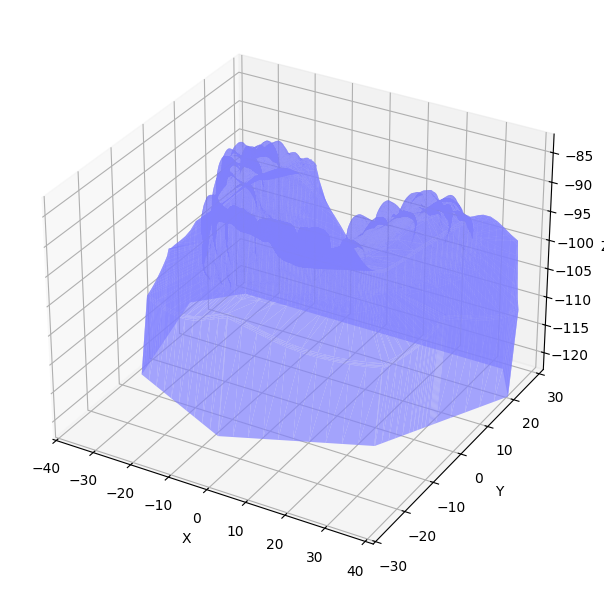

In [9]:
import trimesh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 1. 加载模型
obj_path = "/local/scratch/datasets/Medical/TeethSeg/3DTeethLand_challenge_train_test_split/upper/015DTXR8/015DTXR8_upper.obj"
mesh = trimesh.load(obj_path, process=False)

# 2. 准备顶点和面数据
vertices = mesh.vertices
faces = mesh.faces

# 3. 创建 3D 图
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 4. 创建面集合用于绘制
mesh_collection = Poly3DCollection(vertices[faces], alpha=0.7)
mesh_collection.set_facecolor((0.5, 0.5, 1))  # 淡蓝色
ax.add_collection3d(mesh_collection)

# 5. 设置坐标轴范围
x, y, z = vertices.T
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_zlim(z.min(), z.max())

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.tight_layout()

# 6. 保存为图片
plt.savefig("tooth_3d_preview_matplotlib.png", dpi=300)
print("保存完成：tooth_3d_preview_matplotlib.png")


保存完成：pointcloud_with_labels.png


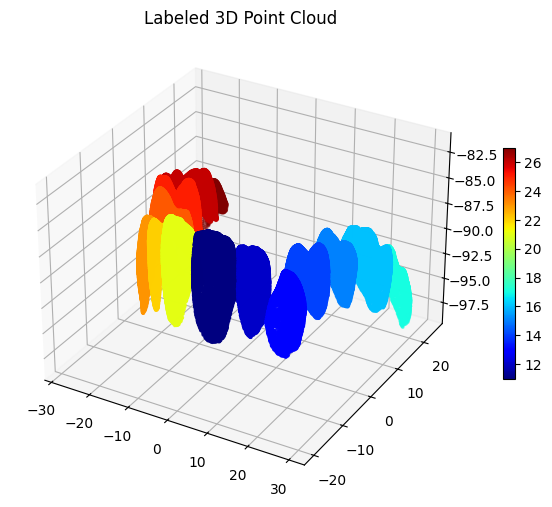

In [10]:
import trimesh
import numpy as np
import json
import matplotlib.pyplot as plt

# 1. 加载 obj 顶点
mesh = trimesh.load(obj_path, process=False)
vertices = mesh.vertices  # (N, 3)

# 2. 加载标签 json
json_path = obj_path.replace(".obj", ".json")
with open(json_path, "r") as f:
    labels = json.load(f)["labels"]

labels = np.array(labels)

# 3. 可视化点云 + 标签（不同颜色代表不同标签）
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 过滤掉标签为 0 的点（无标签或背景）
mask = labels > 0
points = vertices[mask]
colors = labels[mask]

sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, cmap='jet', s=3)
plt.colorbar(sc, ax=ax, shrink=0.5)
plt.title("Labeled 3D Point Cloud")

plt.savefig("pointcloud_with_labels.png", dpi=300)
print("保存完成：pointcloud_with_labels.png")


*** Starting slicing and preview ***


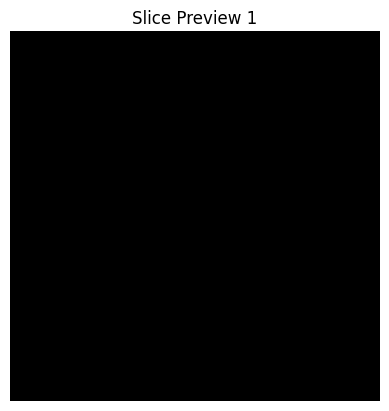

Saved slice_01.npy


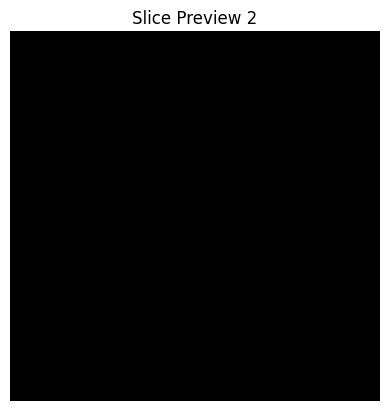

Skipped slice 2.


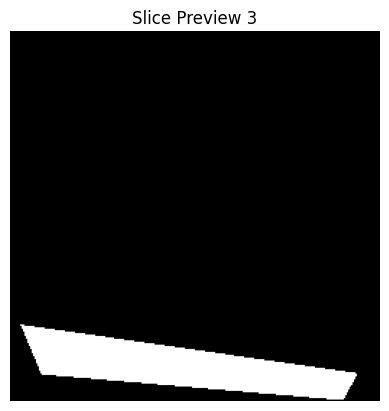

Skipped slice 3.


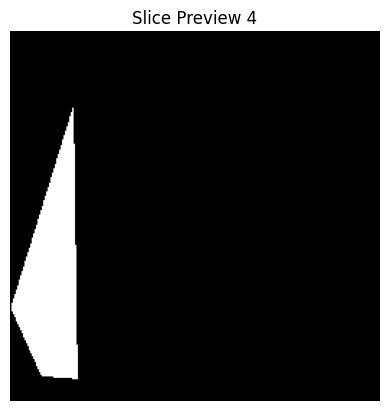

Skipped slice 4.


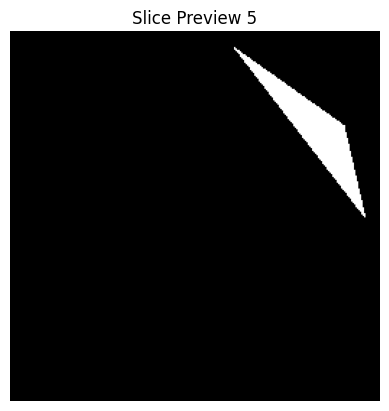

KeyboardInterrupt: Interrupted by user

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os

def load_obj(filepath):
    """
    Load OBJ file, return vertices and face indices
    """
    verts = []
    faces = []
    with open(filepath, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if not parts:
                continue
            if parts[0] == 'v' and len(parts) >= 4:
                x, y, z = map(float, parts[1:4])
                verts.append([x, y, z])
            elif parts[0] == 'f':
                idxs = []
                for token in parts[1:]:
                    vi = int(token.split('/')[0]) - 1
                    idxs.append(vi)
                if len(idxs) == 3:
                    faces.append(idxs)
                elif len(idxs) > 3:
                    for tri in [[0,1,2], [0,2,3]]:
                        faces.append([idxs[i] for i in tri])
    return np.array(verts), np.array(faces)

def slice_mesh(verts, faces, plane_normal, plane_point):
    """
    Slice the mesh with a given plane, return line segments of intersections
    """
    intersections = []
    for face in faces:
        pts = verts[face]
        distances = np.dot(pts - plane_point, plane_normal)
        if np.min(distances) * np.max(distances) < 0:
            cross_points = []
            for i in range(3):
                j = (i + 1) % 3
                if distances[i] * distances[j] < 0:
                    t = distances[i] / (distances[i] - distances[j])
                    point = pts[i] + t * (pts[j] - pts[i])
                    cross_points.append(point)
            if len(cross_points) == 2:
                intersections.append(cross_points)
    return intersections

def draw_intersections_to_image(intersections, plane_normal, img_size=256):
    """
    Draw all intersection line segments into a numpy image
    """
    img = np.ones((img_size, img_size), dtype=np.float32)  # white background

    if np.allclose(plane_normal, [0,0,1]):
        idxs = [0,1]
    elif np.allclose(plane_normal, [1,0,0]):
        idxs = [1,2]
    elif np.allclose(plane_normal, [0,1,0]):
        idxs = [0,2]
    else:
        raise ValueError("Only support slicing along X, Y, or Z axis")

    if not intersections:
        return img

    points = np.array([p for seg in intersections for p in seg])
    min_vals = points.min(axis=0)
    max_vals = points.max(axis=0)
    diff = max_vals[idxs] - min_vals[idxs]
    diff[diff == 0] = 1e-5  # avoid divide by zero

    for seg in intersections:
        p1, p2 = seg
        x1 = (p1[idxs[0]] - min_vals[idxs[0]]) / diff[0]
        y1 = (p1[idxs[1]] - min_vals[idxs[1]]) / diff[1]
        x2 = (p2[idxs[0]] - min_vals[idxs[0]]) / diff[0]
        y2 = (p2[idxs[1]] - min_vals[idxs[1]]) / diff[1]

        x1 = int(x1 * (img_size-1))
        y1 = int(y1 * (img_size-1))
        x2 = int(x2 * (img_size-1))
        y2 = int(y2 * (img_size-1))

        rr, cc = draw_line(y1, x1, y2, x2)
        img[rr, cc] = 0  # draw black line

    return img

def draw_line(y0, x0, y1, x1):
    """
    Simple Bresenham line algorithm
    """
    from skimage.draw import line
    rr, cc = line(y0, x0, y1, x1)
    rr = np.clip(rr, 0, 255)
    cc = np.clip(cc, 0, 255)
    return rr, cc

def main():
    obj_path = "/local/scratch/datasets/Medical/TeethSeg/3DTeethLand_challenge_train_test_split/upper/015DTXR8/015DTXR8_upper.obj"  # Change to your file
    if not os.path.exists(obj_path):
        print(f"Cannot find file: {obj_path}")
        return

    verts, faces = load_obj(obj_path)

    out_dir = 'slices_png_output'
    os.makedirs(out_dir, exist_ok=True)

    # Preview different slices before batch generation
    previews = [
        ("Axial Slice", [0, 0, 1], np.median(verts[:,2])),
        ("Sagittal Slice", [1, 0, 0], np.median(verts[:,0])),
        ("Coronal Left Slice", [0, 1, 0], np.percentile(verts[:,1], 10)),   # Left side
        ("Coronal Right Slice", [0, 1, 0], np.percentile(verts[:,1], 90)),  # Right side
        ("Coronal Front Slice", [0, 1, 0], np.median(verts[:,1])),           # Middle front
    ]

    print("\n*** Preview Stage ***")
    for title, normal, pos in previews:
        plane_normal = np.array(normal)
        plane_point = np.zeros(3)
        if normal[0] == 1:
            plane_point[0] = pos
        elif normal[1] == 1:
            plane_point[1] = pos
        else:
            plane_point[2] = pos

        intersections = slice_mesh(verts, faces, plane_normal, plane_point)
        img = draw_intersections_to_image(intersections, plane_normal, img_size=256)

        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
        plt.show()

    # Ask user confirmation
    proceed = input("Preview finished. Confirm batch generation? (y/n): ")
    if proceed.lower() != 'y':
        print("Batch generation cancelled.")
        return

    # Batch generate all slices
    print("\n*** Batch Generation Stage ***")

    directions = {
        'Axial': ([0, 0, 1], np.linspace(verts[:,2].min(), verts[:,2].max(), 5)),
        'Sagittal': ([1, 0, 0], np.linspace(verts[:,0].min(), verts[:,0].max(), 3)),
        'Coronal': ([0, 1, 0], np.linspace(verts[:,1].min(), verts[:,1].max(), 5)),
    }

    for plane_name, (normal, positions) in directions.items():
        for idx, pos in enumerate(positions):
            plane_normal = np.array(normal)
            plane_point = np.zeros(3)
            if normal[0] == 1:
                plane_point[0] = pos
            elif normal[1] == 1:
                plane_point[1] = pos
            else:
                plane_point[2] = pos

            intersections = slice_mesh(verts, faces, plane_normal, plane_point)
            img = draw_intersections_to_image(intersections, plane_normal, img_size=256)

            save_name = f'{plane_name}_slice_{idx+1:02d}.png'
            save_path = os.path.join(out_dir, save_name)
            plt.imsave(save_path, img, cmap='gray')
            print(f"Saved slice: {save_path}")

    print("\nAll slices generated successfully!")

if __name__ == "__main__":
    main()


In [ ]:
"/local/scratch/datasets/Medical/TeethSeg/3DTeethLand_challenge_train_test_split/upper/015DTXR8/015DTXR8_upper.obj"